In [1]:
# 必要なライブラリの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import csv
%matplotlib inline

In [2]:
# データが格納されている作業ディレクトリまでパス指定
os.chdir("/Users/naokihamaguchi/Desktop/")

# test.csvの読み取り
test = pd.read_csv("test.csv")

# train.csvの読み取り
train = pd.read_csv("train.csv")

In [3]:
test.shape

(1459, 23)

In [4]:
train.shape

(1460, 24)

In [5]:
# testデータの内容を確認
print(test.head())

   MSSubClass  Neighborhood  OverallQual  YearBuilt  YearRemodAdd  MasVnrType  \
0        11.0          10.0          4.0       43.0          11.0         1.0   
1        11.0          10.0          5.0       48.0           8.0         2.0   
2        14.0          14.0          4.0       89.0          48.0         1.0   
3        14.0          14.0          5.0       92.0          48.0         2.0   
4        13.0          22.0          7.0       91.0          33.0         1.0   

   MasVnrArea  ExterQual  Foundation  BsmtQual     ...      GrLivArea  \
0         0.0        1.0         2.0       1.0     ...          896.0   
1       108.0        1.0         2.0       1.0     ...         1329.0   
2         0.0        1.0         5.0       2.0     ...         1629.0   
3        20.0        1.0         5.0       1.0     ...         1604.0   
4         0.0        2.0         5.0       2.0     ...         1280.0   

   FullBath  KitchenQual  TotRmsAbvGrd  Fireplaces  GarageType  GarageYrBl

In [6]:
# trainデータの内容を確認
print(train.head())

   MSSubClass  Neighborhood  OverallQual  YearBuilt  YearRemodAdd  MasVnrType  \
0        14.0          16.0          6.0       96.0          42.0         2.0   
1        11.0          20.0          5.0       70.0          31.0         1.0   
2        14.0          16.0          6.0       99.0          53.0         2.0   
3         9.0          17.0          6.0       31.0          16.0         1.0   
4        14.0          24.0          7.0       87.0          38.0         2.0   

   MasVnrArea  ExterQual  Foundation  BsmtQual    ...      FullBath  \
0       196.0        2.0         5.0       2.0    ...           2.0   
1         0.0        1.0         2.0       2.0    ...           2.0   
2       162.0        2.0         5.0       2.0    ...           2.0   
3         0.0        1.0         1.0       1.0    ...           0.0   
4       350.0        2.0         5.0       2.0    ...           2.0   

   KitchenQual  TotRmsAbvGrd  Fireplaces  GarageType  GarageYrBlt  \
0          2.0   

In [7]:
# 変数の相関を確認
train.corr()

,MSSubClass,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,...,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,SalePrice
MSSubClass,1.000000,0.532233,0.471136,0.572252,0.415910,0.246813,0.212010,0.393934,0.445768,0.423389,...,0.329673,0.391700,0.253413,0.283353,0.510706,0.408647,0.438262,0.397369,0.387789,0.476982
Neighborhood,0.532233,1.000000,0.667647,0.683095,0.521638,0.400196,0.368029,0.631870,0.576118,0.629227,...,0.513701,0.566358,0.282979,0.315569,0.456575,0.579489,0.466576,0.585252,0.529629,0.696882
OverallQual,0.471136,0.667647,1.000000,0.665203,0.552825,0.449358,0.410238,0.726278,0.568969,0.644946,...,0.552153,0.673331,0.423438,0.396765,0.420713,0.574261,0.491404,0.628715,0.562022,0.790982
YearBuilt,0.572252,0.683095,0.665203,1.000000,0.652419,0.420443,0.298983,0.638206,0.699337,0.707715,...,0.555510,0.575836,0.246057,0.214032,0.519992,0.768672,0.554784,0.570728,0.523139,0.619545
YearRemodAdd,0.415910,0.521638,0.552825,0.652419,1.000000,0.310870,0.193044,0.570870,0.551916,0.545541,...,0.452501,0.611669,0.217923,0.162493,0.387933,0.617250,0.446760,0.433995,0.390554,0.535370
MasVnrType,0.246813,0.400196,0.449358,0.420443,0.310870,1.000000,0.579165,0.415825,0.310319,0.393052,...,0.305025,0.362377,0.194912,0.199416,0.315218,0.343755,0.323321,0.429343,0.380290,0.426997
MasVnrArea,0.212010,0.368029,0.410238,0.298983,0.193044,0.579165,1.000000,0.349637,0.209916,0.314065,...,0.266274,0.285190,0.280041,0.247906,0.221484,0.229848,0.251678,0.404375,0.372567,0.475241
ExterQual,0.393934,0.631870,0.726278,0.638206,0.570870,0.415825,0.349637,1.000000,0.597832,0.638241,...,0.497192,0.716122,0.308004,0.249335,0.378696,0.590883,0.482143,0.557218,0.495778,0.682639
Foundation,0.445768,0.576118,0.568969,0.699337,0.551916,0.310319,0.209916,0.597832,1.000000,0.621976,...,0.462312,0.533146,0.180213,0.113338,0.401139,0.644742,0.487728,0.458128,0.398155,0.505503
BsmtQual,0.423389,0.629227,0.644946,0.707715,0.545541,0.393052,0.314065,0.638241,0.621976,1.000000,...,0.523471,0.562345,0.238832,0.227714,0.424760,0.642954,0.525068,0.545306,0.458693,0.635361


In [8]:
# ヒートマップの表示
plt.figure(figsize = (12,9))
sns.heatmap(train.corr(), annnot = True, square = True, fmt = '.2f')
plt.show()

NameError: name 'sns' is not defined

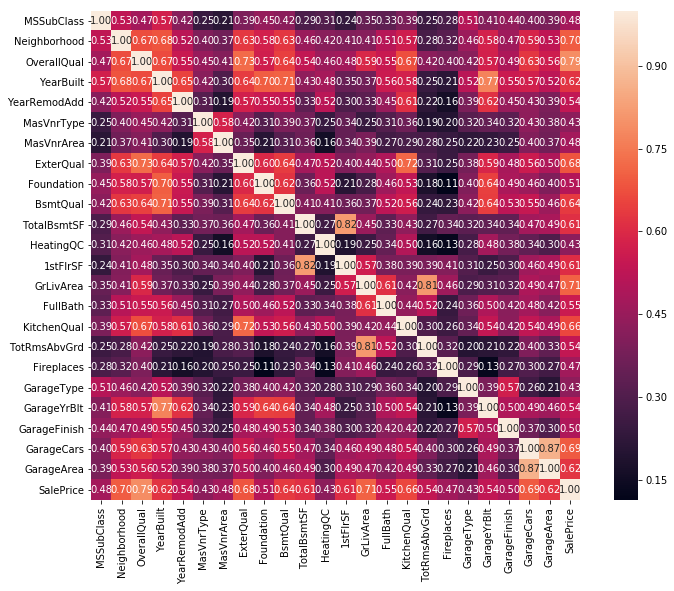

In [9]:
# seabornがインポートされていなかったのでインポート
import seaborn as sns
plt.figure(figsize = (12,9))
sns.heatmap(train.corr(), annot = True, square = True, fmt = '.2f')
plt.show()

In [10]:
# 上のヒートマップよりSalePriceとの相関係数が大きい上位5つは大きい順に
'''
'OverallQual'
'GrLivArea'
'Neighborhood'
'GarageCars'
'ExterQual'
'''

"\n'OverallQual'\n'GrLivArea'\n'Neighborhood'\n'GarageCars'\n'ExterQual'\n"

In [11]:
# 必要な特徴量だけピックアップ
df_pickup = train.loc[:, ['OverallQual', 'GrLivArea', 'Neighborhood', 'GarageCars', 'ExterQual', 'SalePrice']]

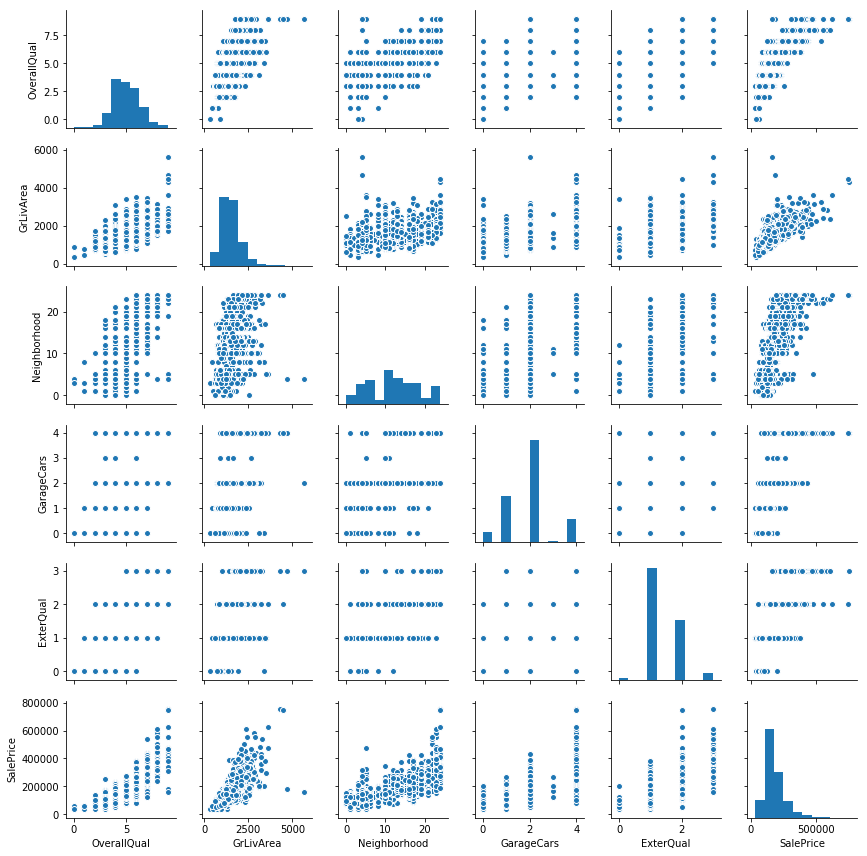

In [12]:
import seaborn as sns
sns.pairplot(df_pickup, size = 2.0)
plt.show()

In [13]:
# 上の結果よりいずれも相関関係がありそうだが、特にOverallQual, Neighborhoodの二つがSalePriceと特に相関がありそう

In [14]:
# 一番最初に読み込むtrainの変数だけ取り除いて、同じ特徴量にして、concat使ってくっつけて、前処理して、し終わったら、サンプル数で

# kaggleからだったら標準化, 主成分分析, 累積寄与率考える, fitで重回帰分析。

In [52]:
# dfを作り直す

# 必要な特徴量だけピックアップ
df_pickup_train = train.loc[:, ['OverallQual', 'GrLivArea', 'Neighborhood', 'GarageCars', 'ExterQual', 'SalePrice']]
df_pickup_test = test.loc[:, ['OverallQual', 'GrLivArea', 'Neighborhood', 'GarageCars', 'ExterQual']]
df = pd.concat([df_pickup_train, df_pickup_test], axis = 0)
df.shape

(2919, 6)

In [184]:
# 全部検証するのが大事
df = np.array(df)
X_1 = df[:1460, 0:4]
y_1 = df[:1460, 5].reshape(-1,1)
X_2 = df[1460:, 0:4]

In [185]:
print(X_1.shape)
print(y_1.shape)
print(X_2.shape)

(1460, 4)
(1460, 1)
(1459, 4)


In [186]:
# どういう形で入っているのかを確認
print(X_1)

[[  2.00000000e+00   2.00000000e+00   1.71000000e+03   1.60000000e+01]
 [  1.00000000e+00   2.00000000e+00   1.26200000e+03   2.00000000e+01]
 [  2.00000000e+00   2.00000000e+00   1.78600000e+03   1.60000000e+01]
 ..., 
 [  3.00000000e+00   1.00000000e+00   2.34000000e+03   1.70000000e+01]
 [  1.00000000e+00   1.00000000e+00   1.07800000e+03   1.00000000e+01]
 [  2.00000000e+00   1.00000000e+00   1.25600000e+03   4.00000000e+00]]


In [198]:
# ホールド・アウト法を利用
from sklearn.model_selection import train_test_split
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size = 0.3, random_state = 0)

In [199]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [200]:
# フィットさせる
lr.fit(X_1_train, y_1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [201]:
# 定数項を出力
lr.intercept_

array([-26490.76112091])

In [202]:
# 係数を出力
lr.coef_

array([[ 29355.72317514,  16992.84719961,     62.12630039,   3344.91741364]])

In [203]:
print('R^2')
print('train : %.3f' % lr.score(X_1_train, y_1_train))
print('test  : %.3f' % lr.score(X_1_test, y_1_test))

R^2
train : 0.779
test  : 0.743


In [204]:
# 自由度調整済み決定係数
# (決定係数, trainまたはtestのサンプル数, 利用した特徴量の数)
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score

In [205]:
print('adjusted R^2')
print('train : %.3f' % adjusted(lr.score(X_1_train, y_1_train), len(y_1_train), 5))
print('test  : %.3f' % adjusted(lr.score(X_1_test, y_1_test), len(y_1_test), 5))

adjusted R^2
train : 0.778
test  : 0.740
